In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('df_final.csv')

In [3]:
df

,Unnamed: 0,index,iin,name_surname,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,...,Only_specialization_name,2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,0,1,1175243,ХАЙРУЛЛИНА ДИЛЬНАЗ ЕРБОЛАТОВНА,137,13,B001 - Педагогика и психология,City,89,непс,...,Педагогика и психология,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
1,1,2,1174974,САДУОВА КАМИЛА ҒАНИҚЫЗЫ,134,302,B001 - Педагогика и психология,City,89,непс,...,Педагогика и психология,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
2,2,3,1031724,ЕРБОЛАТОВА АКБОТА ТАЛГАТОВНА,127,13,B001 - Педагогика и психология,City,89,непс,...,Педагогика и психология,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
3,3,4,1176230,КАШЕНОВА АЙГЕРИМ КАЙРАТОВНА,125,25,B001 - Педагогика и психология,City,89,непс,...,Педагогика и психология,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
4,4,5,1171682,СЕРІКОВА АДИНА ЕРІКҚЫЗЫ,124,302,B001 - Педагогика и психология,City,89,непс,...,Педагогика и психология,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27663,27663,315,1078939,ҚАРЖАУ АЛТЫН ҒАЛЫМЖАНҚЫЗЫ,97,13,B095 - Транспортные услуги,Village,97,мнс,...,Транспортные услуги,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0
27664,27664,316,1088447,ЕРДИМҰРАТ АҚНҰР,97,32,B095 - Транспортные услуги,Village,97,мнс,...,Транспортные услуги,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0
27665,27665,317,1043063,АҚАБАЕВА КАРАҚАТ ЖЕҢІСҚЫЗЫ,97,42,B095 - Транспортные услуги,Village,97,мнс,...,Транспортные услуги,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0
27666,27666,318,904262,ЕРКІНБЕК ЕРАСЫЛ АЙДОСҰЛЫ,97,27,B095 - Транспортные услуги,Village,97,мнс,...,Транспортные услуги,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0


In [4]:
df.columns

Index(['Unnamed: 0', 'index', 'iin', 'name_surname', 'Points', 'Univer_code',
       'specialization_name', 'Status', 'суммабалловсертификата',
       'преимущественноеправо', 'среднийбаллаттестата(диплома)',
       'суммабалловпрофильныхпредметов(творческихэкзаменов)', 'Code',
       'Only_specialization_name', '2020-2021_Max', '2020-2021_Min',
       '2021-2022_Max', '2021-2022_Min', 'difference_Max', 'difference_Min',
       'profile subject_1', 'profile subject_2', 'Count_difference_per_year'],
      dtype='object')

In [5]:
df.drop(columns = ['Unnamed: 0', 'iin','name_surname', 'Code', 'Only_specialization_name'],inplace = True)

In [6]:
df.columns

Index(['index', 'Points', 'Univer_code', 'specialization_name', 'Status',
       'суммабалловсертификата', 'преимущественноеправо',
       'среднийбаллаттестата(диплома)',
       'суммабалловпрофильныхпредметов(творческихэкзаменов)', '2020-2021_Max',
       '2020-2021_Min', '2021-2022_Max', '2021-2022_Min', 'difference_Max',
       'difference_Min', 'profile subject_1', 'profile subject_2',
       'Count_difference_per_year'],
      dtype='object')

In [7]:
type(df['Count_difference_per_year'][0])

numpy.float64

In [8]:
# Errors
# ДЖУМАХАН АЯУЛЫМ
# БАГИРОВ МЯХЯМАД
# ЗЕЙНЕЛЬГАБДИН МИРАС
# АБДРАХИМОВ НУРСУЛТАН
# ГУСЕЙНОВ МАГОМЕД
# АБАВ -БАКИРОВА

In [9]:
df['Points'][2460]

'АГА'

In [10]:
df['Points'][2460] = '106' #025
df['Univer_code'][2460] = '25'


df['Points'][9667] = '118' #421
df['Univer_code'][9667] = '421'

df['Points'][14043] = '86' #522
df['Univer_code'][14043] = '522'

df['Points'][20456] = '50' #053
df['Univer_code'][20456] = '53'

df['Points'][24461] = '68' #036
df['Univer_code'][24461] = '36'

df['Points'][24306] = '67' #036
df['Univer_code'][24306] = '45'
#67 045

C:\Users\fazyl\AppData\Local\Temp\ipykernel_18856\7510844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Points'][2460] = '106' #025
C:\Users\fazyl\AppData\Local\Temp\ipykernel_18856\7510844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Univer_code'][2460] = '25'
C:\Users\fazyl\AppData\Local\Temp\ipykernel_18856\7510844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Points'][9667] = '118' #421
C:\Users\fazyl

In [11]:
df['Univer_code'].value_counts()
for i in range(len(df)):
    if df['Univer_code'][i].isdigit():
        pass
    else:
        print(df['Univer_code'][i], i)

In [12]:
df.columns

Index(['index', 'Points', 'Univer_code', 'specialization_name', 'Status',
       'суммабалловсертификата', 'преимущественноеправо',
       'среднийбаллаттестата(диплома)',
       'суммабалловпрофильныхпредметов(творческихэкзаменов)', '2020-2021_Max',
       '2020-2021_Min', '2021-2022_Max', '2021-2022_Min', 'difference_Max',
       'difference_Min', 'profile subject_1', 'profile subject_2',
       'Count_difference_per_year'],
      dtype='object')

In [13]:
df.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,B001 - Педагогика и психология,City,89,непс,"4,571",46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
1,2,134,302,B001 - Педагогика и психология,City,89,непс,"4,571",46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
2,3,127,13,B001 - Педагогика и психология,City,89,непс,"4,571",46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
3,4,125,25,B001 - Педагогика и психология,City,89,непс,"4,571",46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
4,5,124,302,B001 - Педагогика и психология,City,89,непс,"4,571",46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0


In [14]:
type(df['2020-2021_Max'][0])

numpy.float64

In [15]:
df.fillna(0)
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
# replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
#df = df.reset_index()

In [16]:
for i in range(len(df)):
    df['Points'][i] = int(float(df['Points'][i]))
    df['Univer_code'][i] = int(df['Univer_code'][i])
    df['среднийбаллаттестата(диплома)'][i] = float(df['среднийбаллаттестата(диплома)'][i].replace(',', '.'))
    
    df['2020-2021_Max'][i] = int(float(df['2020-2021_Max'][i]))
    df['2020-2021_Min'][i] = int(float(df['2020-2021_Min'][i]))
    
    df['2021-2022_Max'][i] = int(float(df['2021-2022_Max'][i]))
    df['2021-2022_Min'][i] = int(float(df['2021-2022_Min'][i]))
    
    df['difference_Max'][i] = int(float(df['difference_Max'][i]))
    df['difference_Min'][i] = int(float(df['difference_Min'][i]))
    
    #Count_difference_per_year
    df['Count_difference_per_year'][i] = int(float(df['Count_difference_per_year'][i]))
    #print(i)

C:\Users\fazyl\AppData\Local\Temp\ipykernel_18856\867185896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Points'][i] = int(float(df['Points'][i]))
C:\Users\fazyl\AppData\Local\Temp\ipykernel_18856\867185896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Univer_code'][i] = int(df['Univer_code'][i])
C:\Users\fazyl\AppData\Local\Temp\ipykernel_18856\867185896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['сред

In [17]:
# file_name = 'df_final_telegram.csv'
# df.to_csv(file_name, encoding='utf-8-sig')

In [18]:
df['Points'].value_counts()

72     553
70     536
71     535
73     534
74     533
      ... 
133     50
134     49
138     41
139     37
140     10
Name: Points, Length: 91, dtype: int64

In [19]:
df

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
1,2,134,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
2,3,127,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
3,4,125,25,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
4,5,124,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27663,315,97,13,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0
27664,316,97,32,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0
27665,317,97,42,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0
27666,318,97,27,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0


In [20]:
df['profile subject_1'].value_counts()

Математика                 16299
Биология                    6193
Химия                       1418
Физика                      1242
Творческий экзамен          1039
Иностранный язык             510
Всемирная история            485
География                    462
Казахский /Русский язык       20
Name: profile subject_1, dtype: int64

In [21]:
df['profile subject_2'].value_counts()

Физика                           13965
География                         5534
Химия                             3330
Биология                          1296
Математика                        1242
Творческий экзамен                1039
Всемирная история                  653
Иностранный язык                   504
Основы права                        85
Казахская /Русская литература       20
Name: profile subject_2, dtype: int64

In [22]:
df_4_generate = df.copy()

# Profile Subjects Label Encoding

In [23]:
# apply "le.fit_transform"

categ = ['profile subject_1', 'profile subject_2']

# Encode Categorical Columns
le_subj = LabelEncoder()
df_encoded = df[categ].apply(le_subj.fit_transform)
df[categ] = df[categ].apply(le_subj.fit_transform)
# df[categ] = df[categ].apply(le.fit_transform)
                            
print(df_encoded)
print(le_subj.classes_)

       profile subject_1  profile subject_2
0                      0                  2
1                      0                  2
2                      0                  2
3                      0                  2
4                      0                  2
...                  ...                ...
27663                  5                  2
27664                  5                  2
27665                  5                  2
27666                  5                  2
27667                  5                  2

[27668 rows x 2 columns]
['Биология' 'Всемирная история' 'География' 'Иностранный язык'
 'Казахская /Русская литература' 'Математика' 'Основы права'
 'Творческий экзамен' 'Физика' 'Химия']


In [24]:
df.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


In [25]:
df['specialization_name'].value_counts()

B057 - Информационные технологии                                    3885
B058 - Информационная безопасность                                  2641
B062 - Электротехника и энергетика                                  2166
B071 - Горное дело и добыча полезных ископаемых                     1366
B068 - Производство продуктов питания                               1301
B063 - Электротехника и автоматизация                               1194
B053 - Химия                                                        1153
B054 - Физика                                                       1013
B059 - Коммуникации и коммуникационные технологии                    973
B079 - Лесное хозяйство                                              968
B075 - Кадастр и землеустройство                                     909
B050 - Биологические и смежные науки                                 811
B052 - Наука о земле                                                 770
B064  - Механика и металлообработка                

In [26]:
df.fillna(0)

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27663,315,97,13,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27664,316,97,32,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27665,317,97,42,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27666,318,97,27,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0


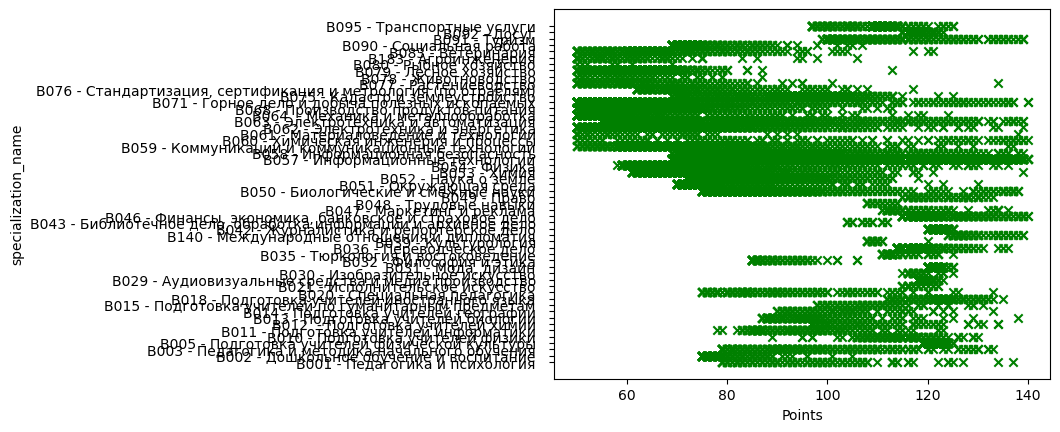

In [27]:
import matplotlib.pyplot as plt
plt.xlabel("Points")
plt.ylabel("specialization_name")
plt.scatter(df[['Points']].values ,df['specialization_name'].values,color = 'green', marker='x')

# Specialization name Label Encoding

In [28]:
# Specialization name

categ = ['specialization_name']

# Encode Categorical Columns
le_spec = LabelEncoder()
df_encoded_spec = df[categ].apply(le_spec.fit_transform)
df[categ] = df[categ].apply(le_spec.fit_transform)
# df[categ] = df[categ].apply(le.fit_transform)
                            
print(df_encoded_spec)
print(le_spec.classes_)

       specialization_name
0                        0
1                        0
2                        0
3                        0
4                        0
...                    ...
27663                   51
27664                   51
27665                   51
27666                   51
27667                   51

[27668 rows x 1 columns]
['B001 - Педагогика и психология  '
 'B002 - Дошкольное обучение и воспитание  '
 'B003 - Педагогика и методика начального обучения  '
 'B005 - Подготовка учителей физической культуры  '
 'B010 - Подготовка учителей физики  '
 'B011 - Подготовка учителей информатики  '
 'B012  - Подготовка учителей химии  '
 'B013 - Подготовка учителей биологии  '
 'B014 - Подготовка учителей географии  '
 'B015 - Подготовка учителей по гуманитарным предметам  '
 'B018 - Подготовка учителей иностранного языка  '
 'B020 - Специальная педагогика  ' 'B021 - Исполнительское искусство  '
 'B029 - Аудиовизуальные средства и медиа производство  '
 'B030 - Изобразите

In [29]:
df.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


# Status Label Encoding

In [30]:
df['Status'].value_counts()

City       24473
Village     3195
Name: Status, dtype: int64

In [31]:
# Status name

categ = ['Status']

# Encode Categorical Columns
le_status = LabelEncoder()
df_encoded_status = df[categ].apply(le_status.fit_transform)
df[categ] = df[categ].apply(le_status.fit_transform)
# df[categ] = df[categ].apply(le.fit_transform)
                            
print(df_encoded_status)
print(le_status.classes_)

       Status
0           0
1           0
2           0
3           0
4           0
...       ...
27663       1
27664       1
27665       1
27666       1
27667       1

[27668 rows x 1 columns]
['City' 'Village']


In [32]:
df.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


# Преимущественное Право Label Encoding

In [33]:
df['преимущественноеправо'].value_counts()

-           19539
мнс          5073
аб           1894
отличник      635
непс          527
Name: преимущественноеправо, dtype: int64

In [34]:
# преимущественноеправо name

categ = ['преимущественноеправо']

# Encode Categorical Columns
le_preimushestvo = LabelEncoder()
df_encoded_preimushestvo = df[categ].apply(le_preimushestvo.fit_transform)
df[categ] = df[categ].apply(le_preimushestvo.fit_transform)
# df[categ] = df[categ].apply(le.fit_transform)
                            
print(df_encoded_preimushestvo)
print(le_preimushestvo.classes_)

       преимущественноеправо
0                          3
1                          3
2                          3
3                          3
4                          3
...                      ...
27663                      2
27664                      2
27665                      2
27666                      2
27667                      2

[27668 rows x 1 columns]
['-' 'аб' 'мнс' 'непс' 'отличник']


In [35]:
df.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


In [36]:
# df = df.reset_index()

In [37]:
df.fillna(0)

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27663,315,97,13,51,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27664,316,97,32,51,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27665,317,97,42,51,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27666,318,97,27,51,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0


In [38]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [39]:
df_4_generate_with_labels = df.copy()

# Training Time

In [40]:
X_df = df.copy() #df.loc[ : , 'Univer_code' : ] #'суммабалловпрофильныхпредметов(творческихэкзаменов)'

In [41]:
X_df.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


In [42]:
Y_df = df['specialization_name']
X_df.drop(columns = ['index', 'specialization_name'],inplace = True)

In [43]:
X_df

,Points,Univer_code,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,137,13,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,134,302,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,127,13,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,125,25,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,124,302,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27663,97,13,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27664,97,32,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27665,97,42,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27666,97,27,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0


In [44]:
Y_df

0         0
1         0
2         0
3         0
4         0
         ..
27663    51
27664    51
27665    51
27666    51
27667    51
Name: specialization_name, Length: 27668, dtype: int32

In [45]:
x = X_df.values

In [46]:
x

array([[137.,  13.,   0., ...,   0.,   2.,  70.],
       [134., 302.,   0., ...,   0.,   2.,  70.],
       [127.,  13.,   0., ...,   0.,   2.,  70.],
       ...,
       [ 97.,  42.,   1., ...,   5.,   2., -52.],
       [ 97.,  27.,   1., ...,   5.,   2., -52.],
       [ 97.,  19.,   1., ...,   5.,   2., -52.]])

In [47]:
df.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


In [48]:
# Y_df = df['Points']
y = Y_df.values

In [49]:
y

array([ 0,  0,  0, ..., 51, 51, 51])

In [50]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.5, random_state = 42) # , random_state = 42


scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
x_train_stat,x_test_stat,y_train_stat,y_test_stat = train_test_split(X_df,Y_df,test_size = 0.2, random_state = 42)

In [52]:
x_test_stat.describe()

,Points,Univer_code,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
count,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000
mean,86.003433,99.016082,0.109866,72.589989,0.576617,4.026127,37.758222,121.633719,69.962956,124.968739,78.827611,3.335020,8.864655,4.023130,6.101735,135.234008
std,22.165990,156.119616,0.312751,21.877073,0.987818,0.685364,20.571618,30.174367,21.660774,29.890727,25.490615,8.547619,9.497930,2.405752,2.964813,470.873486
min,50.000000,2.000000,0.000000,50.000000,0.000000,3.000000,14.000000,0.000000,0.000000,0.000000,0.000000,-106.000000,-104.000000,0.000000,0.000000,-340.000000
25%,68.000000,16.000000,0.000000,55.000000,0.000000,3.500000,21.000000,124.000000,61.000000,124.000000,64.000000,0.000000,1.250000,2.000000,2.000000,-58.000000
50%,83.000000,29.000000,0.000000,69.000000,0.000000,4.133000,29.000000,133.000000,66.000000,138.000000,81.000000,3.000000,6.000000,5.000000,8.000000,-20.000000
75%,104.000000,57.000000,0.000000,88.000000,1.000000,4.571000,48.000000,136.000000,83.000000,140.000000,98.000000,7.000000,15.000000,5.000000,8.000000,175.000000
max,140.000000,522.000000,1.000000,124.000000,4.000000,5.000000,90.000000,140.000000,120.000000,140.000000,126.000000,41.000000,40.000000,8.000000,9.000000,1552.000000


In [53]:
X_df.describe()

,Points,Univer_code,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
count,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000
mean,85.777649,96.873319,0.115476,72.375669,0.584104,4.017186,37.537155,121.341080,69.873175,124.753903,78.772553,3.412823,8.899378,4.004120,6.107995,135.218447
std,22.033588,152.733837,0.319602,21.766609,0.999680,0.686790,20.468508,30.542476,21.701030,30.106364,25.461710,8.201026,9.187414,2.405788,2.969279,472.296441
min,50.000000,2.000000,0.000000,50.000000,0.000000,3.000000,14.000000,0.000000,0.000000,0.000000,0.000000,-106.000000,-104.000000,0.000000,0.000000,-340.000000
25%,68.000000,16.000000,0.000000,55.000000,0.000000,3.429000,21.000000,122.000000,61.000000,123.000000,64.000000,0.000000,2.000000,2.000000,2.000000,-58.000000
50%,82.000000,29.000000,0.000000,69.000000,0.000000,4.071000,29.000000,133.000000,66.000000,137.000000,81.000000,3.000000,6.000000,5.000000,8.000000,-20.000000
75%,103.000000,57.000000,0.000000,88.000000,1.000000,4.571000,48.000000,136.000000,83.000000,140.000000,98.000000,7.000000,15.000000,5.000000,8.000000,175.000000
max,140.000000,522.000000,1.000000,124.000000,4.000000,5.000000,90.000000,140.000000,120.000000,140.000000,126.000000,41.000000,40.000000,8.000000,9.000000,1552.000000


In [54]:
df

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27663,315,97,13,51,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27664,316,97,32,51,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27665,317,97,42,51,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27666,318,97,27,51,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0


In [55]:
#stop

In [56]:
list(X_df.columns)

['Points',
 'Univer_code',
 'Status',
 'суммабалловсертификата',
 'преимущественноеправо',
 'среднийбаллаттестата(диплома)',
 'суммабалловпрофильныхпредметов(творческихэкзаменов)',
 '2020-2021_Max',
 '2020-2021_Min',
 '2021-2022_Max',
 '2021-2022_Min',
 'difference_Max',
 'difference_Min',
 'profile subject_1',
 'profile subject_2',
 'Count_difference_per_year']

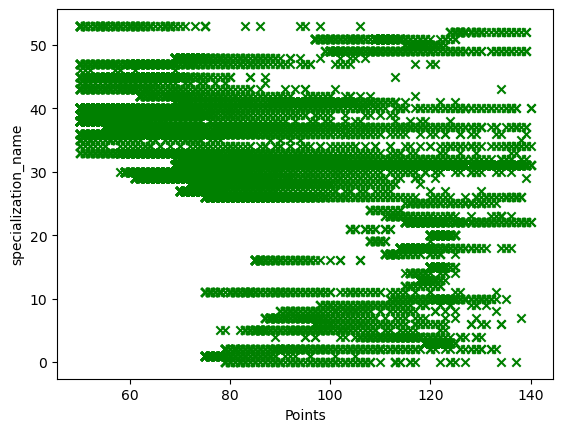

In [57]:
import matplotlib.pyplot as plt
plt.xlabel("Points")
plt.ylabel("specialization_name")
plt.scatter(df[['Points']].values ,df['specialization_name'].values,color = 'green', marker='x')

In [58]:
df_4_generate.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
1,2,134,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
2,3,127,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
3,4,125,25,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
4,5,124,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0


# Generate new Data using AutoEncoder

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import nn, optim
from torch.autograd import Variable

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [60]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [61]:
# file_name = 'data/df_final_encoded.csv'
# df_4_generate_with_labels.to_csv(file_name, encoding='utf-8-sig')

In [62]:
DATA_PATH = 'data/df_final_encoded.csv'

In [63]:
df_4_generate_with_labels.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


In [64]:
df_4_generate['преимущественноеправо'].unique()

array(['непс', '-', 'мнс', 'аб', 'отличник'], dtype=object)

In [65]:
# specialization_name

In [66]:
df_base = df_4_generate_with_labels.copy()

In [67]:
df_base['specialization_name'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 52, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 53, 47, 48,
       49, 50, 51])

In [68]:
len(df_base.columns)

18

In [69]:
cols = df_base.columns

In [70]:
def load_and_standardize_data(path):
    # read in from csv
    df = pd.read_csv(path, sep=',')
    # replace nan with -99
    df = df.fillna(-99)
    df = df.values.reshape(-1, df.shape[1]).astype('float32')
    # randomly split
    X_train, X_test = train_test_split(df, test_size=0.3, random_state=42)
    # standardize values
    scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)   
    return X_train, X_test, scaler

In [71]:
from torch.utils.data import Dataset, DataLoader
class DataBuilder(Dataset):
    def __init__(self, path, train=True):
        self.X_train, self.X_test, self.standardizer = load_and_standardize_data(DATA_PATH)
        if train:
            self.x = torch.from_numpy(self.X_train)
            self.len=self.x.shape[0]
        else:
            self.x = torch.from_numpy(self.X_test)
            self.len=self.x.shape[0]
        del self.X_train
        del self.X_test 
    def __getitem__(self,index):      
        return self.x[index]
    def __len__(self):
        return self.len

In [72]:
traindata_set=DataBuilder(DATA_PATH, train=True)
testdata_set=DataBuilder(DATA_PATH, train=False)

trainloader=DataLoader(dataset=traindata_set,batch_size=1024)
testloader=DataLoader(dataset=testdata_set,batch_size=1024)

In [73]:
type(trainloader.dataset.x), type(testloader.dataset.x)

(torch.Tensor, torch.Tensor)

In [74]:
trainloader.dataset.x.shape, testloader.dataset.x.shape

(torch.Size([19367, 19]), torch.Size([8301, 19]))

In [75]:
trainloader.dataset.x

tensor([[-0.6382, -0.7874,  2.2882,  ...,  0.4158,  0.6364,  0.0847],
        [ 1.4977, -0.8958, -0.4861,  ...,  0.4158,  0.6364, -0.3870],
        [ 0.6414, -0.3529, -0.0768,  ...,  0.4158,  0.6364, -0.2960],
        ...,
        [-1.6231, -0.7222,  1.6060,  ...,  0.8313,  0.3000, -0.2812],
        [ 0.2458, -0.1251, -0.8954,  ...,  0.4158,  0.6364, -0.1649],
        [ 1.2292, -0.2618,  0.2416,  ...,  0.4158, -1.3817, -0.3828]])

In [76]:
class Autoencoder(nn.Module):
    def __init__(self,D_in,H=50,H2=12,latent_dim=3):
        
        #Encoder
        super(Autoencoder,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.lin_bn1 = nn.BatchNorm1d(num_features=H)
        self.linear2=nn.Linear(H,H2)
        self.lin_bn2 = nn.BatchNorm1d(num_features=H2)
        self.linear3=nn.Linear(H2,H2)
        self.lin_bn3 = nn.BatchNorm1d(num_features=H2)
        
        # Latent vectors mu and sigma
        self.fc1 = nn.Linear(H2, latent_dim)
        self.bn1 = nn.BatchNorm1d(num_features=latent_dim)
        self.fc21 = nn.Linear(latent_dim, latent_dim)
        self.fc22 = nn.Linear(latent_dim, latent_dim)

        # Sampling vector
        self.fc3 = nn.Linear(latent_dim, latent_dim)
        self.fc_bn3 = nn.BatchNorm1d(latent_dim)
        self.fc4 = nn.Linear(latent_dim, H2)
        self.fc_bn4 = nn.BatchNorm1d(H2)
        
        # Decoder
        self.linear4=nn.Linear(H2,H2)
        self.lin_bn4 = nn.BatchNorm1d(num_features=H2)
        self.linear5=nn.Linear(H2,H)
        self.lin_bn5 = nn.BatchNorm1d(num_features=H)
        self.linear6=nn.Linear(H,D_in)
        self.lin_bn6 = nn.BatchNorm1d(num_features=D_in)
        
        self.relu = nn.ReLU()
        
    def encode(self, x):
        lin1 = self.relu(self.lin_bn1(self.linear1(x)))
        lin2 = self.relu(self.lin_bn2(self.linear2(lin1)))
        lin3 = self.relu(self.lin_bn3(self.linear3(lin2)))

        fc1 = F.relu(self.bn1(self.fc1(lin3)))

        r1 = self.fc21(fc1)
        r2 = self.fc22(fc1)
        
        return r1, r2
    
    def reparameterize(self, mu, logvar):
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu
        
    def decode(self, z):
        fc3 = self.relu(self.fc_bn3(self.fc3(z)))
        fc4 = self.relu(self.fc_bn4(self.fc4(fc3)))

        lin4 = self.relu(self.lin_bn4(self.linear4(fc4)))
        lin5 = self.relu(self.lin_bn5(self.linear5(lin4)))
        return self.lin_bn6(self.linear6(lin5))


        
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [77]:
class customLoss(nn.Module):
    def __init__(self):
        super(customLoss, self).__init__()
        self.mse_loss = nn.MSELoss(reduction="sum")
    
    def forward(self, x_recon, x, mu, logvar):
        loss_MSE = self.mse_loss(x_recon, x)
        loss_KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

        return loss_MSE + loss_KLD

In [78]:
D_in = traindata_set.x.shape[1]
H = 50
H2 = 12
model = Autoencoder(D_in, H, H2).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [79]:
loss_mse = customLoss()

In [80]:
epochs = 1500
log_interval = 50
val_losses = []
train_losses = []
test_losses = []

In [81]:
def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, data in enumerate(trainloader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_mse(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    if epoch % 200 == 0:        
        print('====> Epoch: {} Average training loss: {:.4f}'.format(
            epoch, train_loss / len(trainloader.dataset)))
        train_losses.append(train_loss / len(trainloader.dataset))

In [82]:
def test(epoch):
    with torch.no_grad():
        test_loss = 0
        for batch_idx, data in enumerate(testloader):
            data = data.to(device)
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data)
            loss = loss_mse(recon_batch, data, mu, logvar)
            test_loss += loss.item()
            if epoch % 200 == 0:        
                print('====> Epoch: {} Average test loss: {:.4f}'.format(
                    epoch, test_loss / len(testloader.dataset)))
            test_losses.append(test_loss / len(testloader.dataset))

In [83]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test(epoch)

====> Epoch: 200 Average training loss: 7.2825
====> Epoch: 200 Average test loss: 0.9325
====> Epoch: 200 Average test loss: 1.7960
====> Epoch: 200 Average test loss: 2.6889
====> Epoch: 200 Average test loss: 3.7667
====> Epoch: 200 Average test loss: 4.6863
====> Epoch: 200 Average test loss: 5.6810
====> Epoch: 200 Average test loss: 6.5924
====> Epoch: 200 Average test loss: 7.5090
====> Epoch: 200 Average test loss: 7.6155
====> Epoch: 400 Average training loss: 6.9465
====> Epoch: 400 Average test loss: 0.8955
====> Epoch: 400 Average test loss: 1.7266
====> Epoch: 400 Average test loss: 2.6001
====> Epoch: 400 Average test loss: 3.6273
====> Epoch: 400 Average test loss: 4.4918
====> Epoch: 400 Average test loss: 5.4774
====> Epoch: 400 Average test loss: 6.3275
====> Epoch: 400 Average test loss: 7.1811
====> Epoch: 400 Average test loss: 7.2810
====> Epoch: 600 Average training loss: 6.7366
====> Epoch: 600 Average test loss: 0.8709
====> Epoch: 600 Average test loss: 1.6901

In [84]:
with torch.no_grad():
    for batch_idx, data in enumerate(testloader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)

In [85]:
# recon_row = scaler.inverse_transform(recon_batch[0].cpu().numpy().reshape(1, -1))
# real_row = scaler.inverse_transform(testloader.dataset.x[0].cpu().numpy().reshape(1, -1))

In [86]:
scaler = trainloader.dataset.standardizer
recon_row = scaler.inverse_transform(recon_batch[0].cpu().numpy().reshape(1, -1))
#recon_row = scaler.inverse_transform(recon_batch[0].cpu().numpy())
real_row = scaler.inverse_transform(testloader.dataset.x[0].cpu().numpy().reshape(1, -1))
#real_row = scaler.inverse_transform(testloader.dataset.x[0].cpu().numpy())

In [87]:
# df = pd.DataFrame(np.stack((recon_row, real_row)), columns = cols)
# df

In [88]:
sigma = torch.exp(logvar/2)

In [89]:
mu[1], sigma[1]

(tensor([-0.4559,  0.9001,  1.1620], device='cuda:0'),
 tensor([0.0960, 0.3992, 0.5073], device='cuda:0'))

In [90]:
mu.mean(axis=0), sigma.mean(axis=0)

(tensor([ 0.0054,  0.0074, -0.0060], device='cuda:0'),
 tensor([0.2890, 0.2884, 0.6209], device='cuda:0'))

In [91]:
# sample z from q
no_samples = 20000
q = torch.distributions.Normal(mu.mean(axis=0), sigma.mean(axis=0))
z = q.rsample(sample_shape=torch.Size([no_samples]))

In [92]:
z.shape

torch.Size([20000, 3])

In [93]:
z[:5]

tensor([[-0.0542, -0.0577, -0.2928],
        [ 0.0329, -0.2966, -1.0326],
        [-0.2515, -0.2189, -0.5290],
        [ 0.2766,  0.0429, -0.9031],
        [ 0.1478, -0.1363,  0.2294]], device='cuda:0')

In [94]:
with torch.no_grad():
    pred = model.decode(z).cpu().numpy()

In [95]:
pred[1]

array([-1.7168291 , -0.6974265 ,  0.2039232 , -0.09189641, -2.0321102 ,
       -0.48790392,  0.3490717 , -0.49435988, -0.5100938 ,  0.3492638 ,
       -0.18315724, -0.11874998, -0.51032734, -0.07151655, -1.0570779 ,
        0.16918504, -1.3556929 , -1.6410772 , -0.2598579 ], dtype=float32)

In [96]:
fake_data = scaler.inverse_transform(pred)
fake_data.shape

(20000, 19)

In [97]:
cols = df_base.columns

In [98]:
type(cols)

pandas.core.indexes.base.Index

In [99]:
cols

Index(['index', 'Points', 'Univer_code', 'specialization_name', 'Status',
       'суммабалловсертификата', 'преимущественноеправо',
       'среднийбаллаттестата(диплома)',
       'суммабалловпрофильныхпредметов(творческихэкзаменов)', '2020-2021_Max',
       '2020-2021_Min', '2021-2022_Max', '2021-2022_Min', 'difference_Max',
       'difference_Min', 'profile subject_1', 'profile subject_2',
       'Count_difference_per_year'],
      dtype='object')

In [100]:
cols.insert(18, 'Great_Dane')

Index(['index', 'Points', 'Univer_code', 'specialization_name', 'Status',
       'суммабалловсертификата', 'преимущественноеправо',
       'среднийбаллаттестата(диплома)',
       'суммабалловпрофильныхпредметов(творческихэкзаменов)', '2020-2021_Max',
       '2020-2021_Min', '2021-2022_Max', '2021-2022_Min', 'difference_Max',
       'difference_Min', 'profile subject_1', 'profile subject_2',
       'Count_difference_per_year', 'Great_Dane'],
      dtype='object')

In [101]:
len(cols)

18

In [102]:
cols_hand = ['Unnamed', 'index', 'Points', 'Univer_code', 'specialization_name', 'Status',
       'суммабалловсертификата', 'преимущественноеправо',
       'среднийбаллаттестата(диплома)',
       'суммабалловпрофильныхпредметов(творческихэкзаменов)', '2020-2021_Max',
       '2020-2021_Min', '2021-2022_Max', '2021-2022_Min', 'difference_Max',
       'difference_Min', 'profile subject_1', 'profile subject_2',
       'Count_difference_per_year']

In [103]:
df_fake = pd.DataFrame(fake_data, columns = cols_hand)
df_fake['specialization_name'] = np.round(df_fake['specialization_name']).astype(int)
df_fake['specialization_name'] = np.where(df_fake['specialization_name']<1, 1, df_fake['specialization_name'])

df_fake['Univer_code'] = np.round(df_fake['Univer_code']).astype(int)
df_fake['Univer_code'] = np.where(df_fake['Univer_code']<1, 1, df_fake['Univer_code'])
df_fake['Univer_code'] = np.where(df_fake['Univer_code']>140, 1, df_fake['Univer_code'])


df_fake.head(10)

,Unnamed,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,12562.263672,553.509888,88.093506,1,32,-0.074471,65.336975,0.393133,3.742081,33.169125,129.573746,67.317993,137.696335,72.822395,7.848858,5.816712,5.282781,7.745795,-19.684835
1,110.962036,171.112640,90.172020,83,9,-0.040208,79.885773,0.092173,3.663220,44.609364,115.801987,67.290321,109.493584,76.958466,-5.136027,10.454241,0.735891,1.228782,12.104302
2,15543.454102,668.649719,104.216209,24,40,-0.074101,93.387932,1.026057,4.391365,53.013874,132.781586,72.894295,139.595871,101.201866,7.150899,27.251076,4.994534,1.881498,-36.058418
3,15561.916992,1935.318237,69.379051,64,35,0.737206,63.750546,-0.289142,4.248519,37.819710,102.056946,62.668659,114.632812,75.110626,11.349750,12.307342,2.971952,12.467625,-29.422369
4,20380.009766,400.609985,88.622429,1,38,0.343994,74.289787,0.291142,3.583992,40.339489,123.956184,67.256256,130.298203,78.607094,5.870735,11.177781,4.876729,4.984449,-175.859268
5,21774.832031,812.053894,61.418400,1,42,0.073201,53.670681,1.168669,3.411212,17.422392,118.244545,52.263863,115.837105,52.482372,-1.968678,0.458003,5.034405,7.480564,-215.611038
6,11940.748047,1348.016602,95.463051,1,31,0.006364,76.526176,0.281999,4.701898,38.001152,137.761993,83.279503,142.727890,86.120186,4.964469,3.170364,5.120980,8.080016,1258.354370
7,13604.748047,1008.560669,69.048523,11,31,-0.043607,52.942333,1.770686,3.128398,17.007917,134.698349,60.744518,141.309143,65.975677,6.466980,5.353055,5.676379,5.957676,-185.275955
8,11825.084961,1440.017822,95.802383,1,31,0.006358,77.395073,0.272528,4.747911,38.349808,138.451080,84.029572,143.109146,86.632843,4.720448,2.932971,5.096463,8.147998,1363.542358
9,13397.310547,384.491760,93.756935,1,31,0.013033,66.692940,0.188114,4.328484,34.068741,130.971893,75.159492,138.385834,77.865089,6.772085,3.226940,4.950528,7.806836,288.241272


In [104]:
len(df_fake)

20000

In [105]:
df_base.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


# Points row calibrating

In [ ]:
# Convert it to int value and set range from 0 to 140

In [109]:
df_fake['Points'] = np.round(df_fake['Points']).astype(int)
df_fake['Points'] = np.where(df_fake['Points']<1, 1, df_fake['Points'])
df_fake['Points'] = np.where(df_fake['Points']>140, 1, df_fake['Points'])

In [111]:
df_fake['Points'].unique()

array([ 88,  90, 104,  69,  89,  61,  95,  96,  94,  92,  79,  66,  87,
       120,  65,  85,  84, 126,  82, 119, 122,  86,  97,  59,  93,  70,
       116, 107,  57,  64,  63, 114, 111,  75,  62, 110, 117, 106,  72,
        67, 105,  74,  77,  80,  68, 101, 109,  58,  91,  98, 103,  73,
        83,  81,  76, 123, 124, 121,  71,  99, 125, 128, 112,  78, 118,
       102, 100, 108, 113,  60,  56, 115, 127, 129,  53, 134, 138,  55,
       139, 131, 140, 137,  52,  54, 133, 132, 130, 135,  51])

In [115]:
df_fake.head()

,Unnamed,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,12562.263672,553.509888,88,1,32,-0.074471,65.336975,0.393133,3.742081,33.169125,129.573746,67.317993,137.696335,72.822395,7.848858,5.816712,5.282781,7.745795,-19.684835
1,110.962036,171.112640,90,83,9,-0.040208,79.885773,0.092173,3.663220,44.609364,115.801987,67.290321,109.493584,76.958466,-5.136027,10.454241,0.735891,1.228782,12.104302
2,15543.454102,668.649719,104,24,40,-0.074101,93.387932,1.026057,4.391365,53.013874,132.781586,72.894295,139.595871,101.201866,7.150899,27.251076,4.994534,1.881498,-36.058418
3,15561.916992,1935.318237,69,64,35,0.737206,63.750546,-0.289142,4.248519,37.819710,102.056946,62.668659,114.632812,75.110626,11.349750,12.307342,2.971952,12.467625,-29.422369
4,20380.009766,400.609985,89,1,38,0.343994,74.289787,0.291142,3.583992,40.339489,123.956184,67.256256,130.298203,78.607094,5.870735,11.177781,4.876729,4.984449,-175.859268


# Univer code row calibrating

In [ ]:
df_fake['Univer_code'] = np.round(df_fake['Univer_code']).astype(int)
df_fake['Univer_code'] = np.where(df_fake['Univer_code']<1, 1, df_fake['Univer_code'])
df_fake['Univer_code'] = np.where(df_fake['Univer_code']>140, 1, df_fake['Univer_code'])

In [ ]:
df_base['Univer_code'].unique()

# Specialization_name row calibrating

In [117]:
df_fake['specialization_name'] = np.round(df_fake['specialization_name']).astype(int)
df_fake['specialization_name'] = np.where(df_fake['specialization_name']<0, 1, df_fake['specialization_name'])
df_fake['specialization_name'] = np.where(df_fake['specialization_name']>53, 1, df_fake['specialization_name'])

In [119]:
len(df_fake['specialization_name'].unique())

53

In [120]:
len(df_base['specialization_name'].unique())

54

In [121]:
df_fake.head()

,Unnamed,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,12562.263672,553.509888,88,1,32,-0.074471,65.336975,0.393133,3.742081,33.169125,129.573746,67.317993,137.696335,72.822395,7.848858,5.816712,5.282781,7.745795,-19.684835
1,110.962036,171.112640,90,83,9,-0.040208,79.885773,0.092173,3.663220,44.609364,115.801987,67.290321,109.493584,76.958466,-5.136027,10.454241,0.735891,1.228782,12.104302
2,15543.454102,668.649719,104,24,40,-0.074101,93.387932,1.026057,4.391365,53.013874,132.781586,72.894295,139.595871,101.201866,7.150899,27.251076,4.994534,1.881498,-36.058418
3,15561.916992,1935.318237,69,64,35,0.737206,63.750546,-0.289142,4.248519,37.819710,102.056946,62.668659,114.632812,75.110626,11.349750,12.307342,2.971952,12.467625,-29.422369
4,20380.009766,400.609985,89,1,38,0.343994,74.289787,0.291142,3.583992,40.339489,123.956184,67.256256,130.298203,78.607094,5.870735,11.177781,4.876729,4.984449,-175.859268


# Status row calibrating

In [124]:
df_fake['Status'] = np.round(df_fake['Status']).astype(int)
df_fake['Status'] = np.where(df_fake['Status']<0, 1, df_fake['Status'])
df_fake['Status'] = np.where(df_fake['Status']>1, 1, df_fake['Status'])

In [125]:
df_base['Status'].unique()

array([0, 1])

In [126]:
df_fake['Status'].unique()

array([0, 1])

# суммабалловсертификата row calibrating

In [ ]:
df_fake['суммабалловсертификата'] = np.round(df_fake['суммабалловсертификата']).astype(int)
df_fake['суммабалловсертификата'] = np.where(df_fake['суммабалловсертификата']<0, 1, df_fake['суммабалловсертификата'])
df_fake['суммабалловсертификата'] = np.where(df_fake['суммабалловсертификата']>1, 1, df_fake['суммабалловсертификата'])

In [127]:
df_base['суммабалловсертификата'].unique()

array([ 89,  79,  75, 122, 119, 113, 105,  78,  92,  83,  88,  93,  87,
        98,  90, 107, 120, 112,  80, 115, 118,  85, 111, 114, 108, 124,
       104,  70,  72,  61,  58,  69,  50,  55,  52,  62,  99, 109,  97],
      dtype=int64)

In [ ]:
# There must be max value

In [128]:
df_fake['суммабалловсертификата'].unique()

array([ 65.336975,  79.88577 ,  93.38793 , ..., 109.293335, 118.914986,
        69.220436], dtype=float32)

# преимущественноеправо row calibrating

In [188]:
df_fake.head()

,Unnamed,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,12562.263672,553.509888,88,1,32,0,65.336975,0,3.742081,33.169125,130,67,138,73,7.848858,5.816712,5,8,-19.684835
1,110.962036,171.112640,90,83,9,0,79.885773,0,3.663220,44.609364,116,67,109,77,-5.136027,10.454241,1,1,12.104302
2,15543.454102,668.649719,104,24,40,0,93.387932,1,4.391365,53.013874,133,73,140,101,7.150899,27.251076,5,2,-36.058418
3,15561.916992,1935.318237,69,64,35,1,63.750546,0,4.248519,37.819710,102,63,115,75,11.349750,12.307342,3,1,-29.422369
4,20380.009766,400.609985,89,1,38,0,74.289787,0,3.583992,40.339489,124,67,130,79,5.870735,11.177781,5,5,-175.859268


In [132]:
df_fake['преимущественноеправо'] = np.round(df_fake['преимущественноеправо']).astype(int)
df_fake['преимущественноеправо'] = np.where(df_fake['преимущественноеправо']<0, 1, df_fake['преимущественноеправо'])
df_fake['преимущественноеправо'] = np.where(df_fake['преимущественноеправо']>4, 1, df_fake['преимущественноеправо'])

In [133]:
df_base['преимущественноеправо'].unique()

array([3, 0, 2, 1, 4])

In [134]:
df_fake['преимущественноеправо'].unique()

array([0, 1, 2, 3, 4])

# среднийбаллаттестата(диплома) row calibrating

In [138]:
#df_fake['среднийбаллаттестата(диплома)'] = np.round(df_fake['среднийбаллаттестата(диплома)']).astype(int)
df_fake['среднийбаллаттестата(диплома)'] = np.where(df_fake['среднийбаллаттестата(диплома)']<0, 1, df_fake['среднийбаллаттестата(диплома)'])
df_fake['среднийбаллаттестата(диплома)'] = np.where(df_fake['среднийбаллаттестата(диплома)']>5, 1, df_fake['среднийбаллаттестата(диплома)'])

In [142]:
len(df_base['среднийбаллаттестата(диплома)'].unique())

32

In [141]:
len(df_fake['среднийбаллаттестата(диплома)'].unique())

19487

In [143]:
df_fake.head()

,Unnamed,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,12562.263672,553.509888,88,1,32,0,65.336975,0,3.742081,33.169125,129.573746,67.317993,137.696335,72.822395,7.848858,5.816712,5.282781,7.745795,-19.684835
1,110.962036,171.112640,90,83,9,0,79.885773,0,3.663220,44.609364,115.801987,67.290321,109.493584,76.958466,-5.136027,10.454241,0.735891,1.228782,12.104302
2,15543.454102,668.649719,104,24,40,0,93.387932,1,4.391365,53.013874,132.781586,72.894295,139.595871,101.201866,7.150899,27.251076,4.994534,1.881498,-36.058418
3,15561.916992,1935.318237,69,64,35,1,63.750546,0,4.248519,37.819710,102.056946,62.668659,114.632812,75.110626,11.349750,12.307342,2.971952,12.467625,-29.422369
4,20380.009766,400.609985,89,1,38,0,74.289787,0,3.583992,40.339489,123.956184,67.256256,130.298203,78.607094,5.870735,11.177781,4.876729,4.984449,-175.859268


# суммабалловпрофильныхпредметов(творческихэкзаменов) row calibrating

In [ ]:
# df_fake['суммабалловпрофильныхпредметов(творческихэкзаменов)'] = np.round(df_fake['суммабалловпрофильныхпредметов(творческихэкзаменов)']).astype(int)
# df_fake['суммабалловпрофильныхпредметов(творческихэкзаменов)'] = np.where(df_fake['суммабалловпрофильныхпредметов(творческихэкзаменов)']<0, 1, df_fake['суммабалловпрофильныхпредметов(творческихэкзаменов)'])
# df_fake['суммабалловпрофильныхпредметов(творческихэкзаменов)'] = np.where(df_fake['суммабалловпрофильныхпредметов(творческихэкзаменов)']>5, 1, df_fake['суммабалловпрофильныхпредметов(творческихэкзаменов)'])

In [ ]:
# Find max value of this

In [144]:
len(df_base['суммабалловпрофильныхпредметов(творческихэкзаменов)'].unique())

45

In [146]:
df_base.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


In [145]:
len(df_fake['суммабалловпрофильныхпредметов(творческихэкзаменов)'].unique())

19838

# 2020-2021_Max row calibrating

In [149]:
df_base['2020-2021_Max'].unique()

array([131.,  96., 108., 133.,  75., 120., 112., 136.,  97., 129.,  92.,
       125.,  91.,  89.,  93., 104., 115., 117., 119., 113., 134., 138.,
       116., 106., 132., 140.,  88.,  77., 122.,  99.,  61.,   0.,  65.,
        64., 124., 128., 107.,  86.,  73., 137., 118.])

In [153]:
df_fake['2020-2021_Max'] = np.round(df_fake['2020-2021_Max']).astype(int)
df_fake['2020-2021_Max'] = np.where(df_fake['2020-2021_Max']<0, 1, df_fake['2020-2021_Max'])
df_fake['2020-2021_Max'] = np.where(df_fake['2020-2021_Max']>140, 1, df_fake['2020-2021_Max'])

In [154]:
df_fake['2020-2021_Max'].unique()

array([130, 116, 133, 102, 124, 118, 138, 135, 131, 127, 132, 129,   1,
       117, 123, 134,  78, 122, 110,  73,  66, 126,  93, 128, 140, 139,
       113,  76, 103, 125,  79,  77,  81,  91, 136, 115, 112,  87, 104,
       109,  90,  85, 101, 137,  22, 119, 111,  88,  86,  59,  72, 114,
       120,  92,  11,  99,  62,  52, 108,  67,  94, 121,  53,  89,  97,
       106,  84,  23,  40,  19,   2,  20,  21,   3,  56,   4, 105,  49,
        65,  69,  98,  61,  57,  41,  60,  12,  13, 100,  96,  45,  82,
        55,  83,  51,  75,  44,  58,  70,  54,  71,   6,   7,  47, 107,
        95,  36,   9,  64,   5,  68,  25,  35,  43,  29,  80,  31,  26,
        10,  42,  39,  18,  74,  63,  15,  24,  16,  48,  37,  50,  28,
        38,  27,   8,  34,  33,   0,  14,  32,  46,  17,  30])

# 2020-2021_Min row calibrating

In [155]:
df_base['2020-2021_Min'].unique()

array([ 97.,  91.,  70.,  75., 112., 111.,  98.,  94.,  80., 102.,  84.,
        90.,  82., 104.,  93.,  89.,  73., 109.,  85., 110.,  66., 100.,
       101.,  95., 120., 113., 106., 103.,  96., 108.,  69.,  65.,  58.,
        88.,  83.,  78.,  56.,  51.,  50.,  61.,   0.,  63.,  53.,  64.,
        60.,  62.,  68., 107.])

In [156]:
df_fake['2020-2021_Min'] = np.round(df_fake['2020-2021_Min']).astype(int)
df_fake['2020-2021_Min'] = np.where(df_fake['2020-2021_Min']<0, 1, df_fake['2020-2021_Min'])
df_fake['2020-2021_Min'] = np.where(df_fake['2020-2021_Min']>140, 1, df_fake['2020-2021_Min'])

In [157]:
df_fake['2020-2021_Min'].unique()

array([ 67,  73,  63,  52,  83,  61,  84,  75,  80,  68,  62,  65,  69,
        64,  91,  66, 114,  60, 105, 109,  58,  92,  94,  56,  51,  48,
        96,  98,  47,  95, 103,  74,  59,  90,  57,  55,  88,  71,  89,
        49,  72,  82,  86,  77,  46,  76,  45,   1,  70,  18,  53, 113,
        78, 111,  54,  85, 100,  79,  10,  93,  41,   4, 116,  81,  99,
       115,  42,  97,  20,  87,  43,  13,   2, 104, 102, 108, 112,   9,
         3, 106,  38, 101,  11,  50,  34,  35,  27,  44,  30,  17, 110,
       107,  39,   0,  12,  37,   6,   7,   8,  23,  14,  21,  22,  36,
        15,  26,  32,  31,  28,   5,  40,  19,  33,  16,  24,  29,  25])

# 2021-2022_Max row calibrating

In [160]:
df_fake['2021-2022_Max'] = np.round(df_fake['2021-2022_Max']).astype(int)
df_fake['2021-2022_Max'] = np.where(df_fake['2021-2022_Max']<0, 1, df_fake['2021-2022_Max'])
df_fake['2021-2022_Max'] = np.where(df_fake['2021-2022_Max']>140, 1, df_fake['2021-2022_Max'])

In [161]:
df_fake['2021-2022_Max'].unique()

array([138, 109, 140, 115, 130, 116,   1, 121, 124, 134, 119, 135, 111,
       103, 120, 137, 139, 117, 133, 123,  96,  94, 129, 105, 136, 113,
        88, 118, 132,  99, 108,  90,  87,  89, 126, 101,  93,  59,  26,
        92, 100, 127, 106,  55,  73, 131, 107, 128, 125,  18,  61, 110,
       112,  80, 102, 114,  27,  98,  41,  20,  74,   2,  97,  23,  82,
        77,  83, 122,  95,  44, 104,   8,  50,  66,  11,  49,  75,  71,
        62,  58,  91,  86,  48,  78,  63,  56,   9,  46,  57,  35,  10,
        72,  84,  70,  81,  54,  13,  29,  76,  85,  37,  43,  25,  31,
        60,  30,  42,  47,   6,  68,  21,  52,  33,  79,  32,  22,  38,
        16,  53,  40,  51,  39,  69,  34,   7,  45,  17,  64,  28,   3,
        14,  67,  24,   0,  36,   4,  12,   5,  15,  65,  19])

In [162]:
df_base['2021-2022_Max'].unique()

array([138.,  96., 101., 132., 104., 125., 123., 137., 111., 126.,  90.,
       124., 102., 106., 128., 139., 119.,  95., 135., 140., 114., 121.,
         0., 115., 127., 131.,  80.,  64., 136.,  71.,  98., 113.,  89.,
       109., 117.,  75., 118.])

In [163]:
df_base.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


# 2021-2022_Min row calibrating

In [164]:
df_base['2021-2022_Min'].unique()

array([ 97.,  90.,  75., 104.,  99., 123., 111., 107.,  91.,  85., 103.,
       106., 102., 101.,  96., 119., 112.,  95., 115., 121.,  82., 113.,
       110., 126., 120., 118.,   0., 116.,  86.,  73.,  77.,  64.,  84.,
        81.,  80.,  72.,  50.,  54.,  78.,  71.,  66.,  98.,  69.,  51.,
        68., 109.])

In [165]:
df_fake['2021-2022_Min'] = np.round(df_fake['2021-2022_Min']).astype(int)
df_fake['2021-2022_Min'] = np.where(df_fake['2021-2022_Min']<0, 1, df_fake['2021-2022_Min'])
df_fake['2021-2022_Min'] = np.where(df_fake['2021-2022_Min']>140, 1, df_fake['2021-2022_Min'])

In [166]:
df_fake['2021-2022_Min'].unique()

array([ 73,  77, 101,  75,  79,  52,  86,  66,  87,  78,  72,  96,  76,
       109,  90,  74,  82,  81, 124,  63,  84, 118,  80,  71,  85,  70,
        95, 112, 103,  57,  51,  45, 114, 111,  43, 115, 113,  44, 116,
        83,  91,  61,  68,  88,  67, 107,  55, 122, 102, 121, 108,  99,
        46,  59,  49,  94,  69,  93,  54, 110,  58,  64,  41,   1,  62,
        60,  23,  53,  89, 100,  48,  65, 106,  20,  42,  97, 123,  56,
        92,  98, 104, 105,  47,  50,  16,   0, 120,  32,   9,  11,   4,
        21, 125,  17,  37, 117,  25, 119,  12,  36,   3,  15,  10,  26,
         5,  29,  13,  35,  39,   8,  34,  27,  40,  22,  14,  19,  33,
        30,   7,  24,   6,  38,  31,  28, 126,   2,  18, 129])

In [167]:
df_fake.head()

,Unnamed,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,12562.263672,553.509888,88,1,32,0,65.336975,0,3.742081,33.169125,130,67,138,73,7.848858,5.816712,5.282781,7.745795,-19.684835
1,110.962036,171.112640,90,83,9,0,79.885773,0,3.663220,44.609364,116,67,109,77,-5.136027,10.454241,0.735891,1.228782,12.104302
2,15543.454102,668.649719,104,24,40,0,93.387932,1,4.391365,53.013874,133,73,140,101,7.150899,27.251076,4.994534,1.881498,-36.058418
3,15561.916992,1935.318237,69,64,35,1,63.750546,0,4.248519,37.819710,102,63,115,75,11.349750,12.307342,2.971952,12.467625,-29.422369
4,20380.009766,400.609985,89,1,38,0,74.289787,0,3.583992,40.339489,124,67,130,79,5.870735,11.177781,4.876729,4.984449,-175.859268


# difference_Max and difference_Min row subtraction

In [ ]:
# df_fake['2021-2022_Min'] = np.round(df_fake['2021-2022_Min']).astype(int)
# df_fake['2021-2022_Min'] = np.where(df_fake['2021-2022_Min']<0, 1, df_fake['2021-2022_Min'])
# df_fake['2021-2022_Min'] = np.where(df_fake['2021-2022_Min']>140, 1, df_fake['2021-2022_Min'])

# profile subject_1 row calibrating

In [168]:
df_fake['profile subject_1'].unique()

array([5.282781  , 0.73589116, 4.9945335 , ..., 6.443518  , 5.6507273 ,
       4.4198484 ], dtype=float32)

In [170]:
len(df_base['profile subject_1'].unique())

9

In [171]:
df_fake['profile subject_1'] = np.round(df_fake['profile subject_1']).astype(int)
df_fake['profile subject_1'] = np.where(df_fake['profile subject_1']<0, 1, df_fake['profile subject_1'])
df_fake['profile subject_1'] = np.where(df_fake['profile subject_1']>9, 1, df_fake['profile subject_1'])

In [173]:
df_fake.head()

,Unnamed,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,12562.263672,553.509888,88,1,32,0,65.336975,0,3.742081,33.169125,130,67,138,73,7.848858,5.816712,5,7.745795,-19.684835
1,110.962036,171.112640,90,83,9,0,79.885773,0,3.663220,44.609364,116,67,109,77,-5.136027,10.454241,1,1.228782,12.104302
2,15543.454102,668.649719,104,24,40,0,93.387932,1,4.391365,53.013874,133,73,140,101,7.150899,27.251076,5,1.881498,-36.058418
3,15561.916992,1935.318237,69,64,35,1,63.750546,0,4.248519,37.819710,102,63,115,75,11.349750,12.307342,3,12.467625,-29.422369
4,20380.009766,400.609985,89,1,38,0,74.289787,0,3.583992,40.339489,124,67,130,79,5.870735,11.177781,5,4.984449,-175.859268


# profile subject_1 row calibrating

In [180]:
df_fake['profile subject_2'].unique()

array([ 8,  1,  2,  5,  7,  6,  3,  9,  4, 10,  0])

In [177]:
len(df_base['profile subject_2'].unique())

10

In [181]:
df_fake['profile subject_2'] = np.round(df_fake['profile subject_2']).astype(int)
df_fake['profile subject_2'] = np.where(df_fake['profile subject_2']<0, 1, df_fake['profile subject_2'])
df_fake['profile subject_2'] = np.where(df_fake['profile subject_2']>9, 1, df_fake['profile subject_2'])

In [182]:
df_fake.head()

,Unnamed,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,12562.263672,553.509888,88,1,32,0,65.336975,0,3.742081,33.169125,130,67,138,73,7.848858,5.816712,5,8,-19.684835
1,110.962036,171.112640,90,83,9,0,79.885773,0,3.663220,44.609364,116,67,109,77,-5.136027,10.454241,1,1,12.104302
2,15543.454102,668.649719,104,24,40,0,93.387932,1,4.391365,53.013874,133,73,140,101,7.150899,27.251076,5,2,-36.058418
3,15561.916992,1935.318237,69,64,35,1,63.750546,0,4.248519,37.819710,102,63,115,75,11.349750,12.307342,3,1,-29.422369
4,20380.009766,400.609985,89,1,38,0,74.289787,0,3.583992,40.339489,124,67,130,79,5.870735,11.177781,5,5,-175.859268


# Count_difference_per_year row calibrating

In [183]:
df_fake['Count_difference_per_year'].unique()

array([-19.684835,  12.104302, -36.05842 , ..., -67.78344 , -74.93618 ,
       194.93684 ], dtype=float32)

In [184]:
df_base['Count_difference_per_year'].unique()

array([  70.,   20., -185.,    2.,  -62.,  -99.,  -40.,  -30.,  -15.,
        -32., -340.,  -50.,   10.,   -4.,    0.,  -20.,   -5.,  -14.,
         37.,  -10.,   74.,    5.,  -84.,  -43.,  -11.,  175., 1552.,
         57.,  214., -145.,  -70.,  -35., -192.,  -46.,  -95.,  -31.,
        -48.,  -58.,  223., -135.,  -52.])

In [185]:
df_fake['profile subject_2'] = np.round(df_fake['profile subject_2']).astype(int)
# df_fake['profile subject_2'] = np.where(df_fake['profile subject_2']<0, 1, df_fake['profile subject_2'])
# df_fake['profile subject_2'] = np.where(df_fake['profile subject_2']>9, 1, df_fake['profile subject_2'])

In [186]:
df_fake.head()

,Unnamed,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,12562.263672,553.509888,88,1,32,0,65.336975,0,3.742081,33.169125,130,67,138,73,7.848858,5.816712,5,8,-19.684835
1,110.962036,171.112640,90,83,9,0,79.885773,0,3.663220,44.609364,116,67,109,77,-5.136027,10.454241,1,1,12.104302
2,15543.454102,668.649719,104,24,40,0,93.387932,1,4.391365,53.013874,133,73,140,101,7.150899,27.251076,5,2,-36.058418
3,15561.916992,1935.318237,69,64,35,1,63.750546,0,4.248519,37.819710,102,63,115,75,11.349750,12.307342,3,1,-29.422369
4,20380.009766,400.609985,89,1,38,0,74.289787,0,3.583992,40.339489,124,67,130,79,5.870735,11.177781,5,5,-175.859268


In [187]:
df_base.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


In [ ]:
# Last check

In [189]:
df_fake['specialization_name'].unique()

array([32,  9, 40, 35, 38, 42, 31, 48, 29, 36, 15, 27, 30, 10, 12, 41,  1,
       18, 16, 11,  5,  3, 39, 21, 34,  7, 37, 46, 47, 33, 28, 20,  2,  4,
       13, 22, 14, 45, 19, 51, 17, 50, 44,  8,  6, 49, 24, 43, 25, 26, 23,
       53, 52])

In [190]:
df_fake

,Unnamed,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,12562.263672,553.509888,88,1,32,0,65.336975,0,3.742081,33.169125,130,67,138,73,7.848858,5.816712,5,8,-19.684835
1,110.962036,171.112640,90,83,9,0,79.885773,0,3.663220,44.609364,116,67,109,77,-5.136027,10.454241,1,1,12.104302
2,15543.454102,668.649719,104,24,40,0,93.387932,1,4.391365,53.013874,133,73,140,101,7.150899,27.251076,5,2,-36.058418
3,15561.916992,1935.318237,69,64,35,1,63.750546,0,4.248519,37.819710,102,63,115,75,11.349750,12.307342,3,1,-29.422369
4,20380.009766,400.609985,89,1,38,0,74.289787,0,3.583992,40.339489,124,67,130,79,5.870735,11.177781,5,5,-175.859268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,992.177856,4.873508,119,102,11,0,114.582458,0,4.294990,77.570999,130,105,133,117,3.475921,12.142960,5,4,-86.292244
19996,23849.568359,433.568298,104,97,45,0,98.675133,2,4.812843,57.416615,134,86,133,103,0.000556,16.515299,2,3,21.069658
19997,225.005005,-75.842987,113,55,6,1,109.293335,2,4.743842,71.198479,99,100,112,110,10.905054,9.311588,6,6,-67.783440
19998,1047.014771,-30.756191,122,119,12,0,118.914986,0,4.241050,82.888794,129,109,134,121,4.658145,11.716415,6,4,-74.936180


In [ ]:
# Last push commit 'Second commit'